In [30]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
path = '/Users/oberrauch/work/master/data/cluster_output/single_glaciers/hef_mb_elev_never.nc'
ds = xr.load_dataset(path)

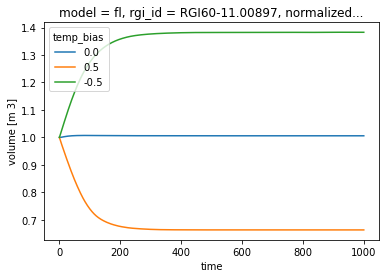

In [54]:
ds.sel(mb_model='constant', model='fl', normalized=1, rgi_id='RGI60-11.00897').volume.plot.line(x='time')

In [56]:
1-0.66316358

0.33683642

In [57]:
1-1.38278878

-0.38278878000000005

In [55]:
ds.sel(mb_model='constant', model='fl', normalized=1, rgi_id='RGI60-11.00897').volume.isel(time=-1)

<xarray.DataArray 'volume' (temp_bias: 3)>
array([1.00589072, 0.66316358, 1.38278878])
Coordinates:
    calendar_month  int64 10
    calendar_year   int64 999
    hydro_year      int64 1000
    hydro_month     int64 1
    model           <U2 'fl'
    time            float64 1e+03
    rgi_id          <U14 'RGI60-11.00897'
    normalized      int64 1
  * temp_bias       (temp_bias) float64 0.0 0.5 -0.5
    mb_model        <U8 'constant'
Attributes:
    description:  Total glacier volume
    units:        m 3

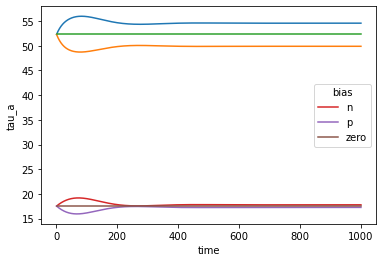

In [23]:
# define path and open datasets
dir_path = '/Users/oberrauch/work/master/data/tau/'
f_name = '{}_bias_{}.nc'
mb_model = 'constant'
bias = ['n', 'p', 'zero']
ds = list()
for b in bias:
    f_path = os.path.join(dir_path, f_name.format(mb_model, b))
    ds.append(xr.open_dataset(f_path))
    
# concat datasets into one
ds = xr.concat(ds, dim=pd.Index(data=bias, name='bias'))
# remove entry at time = 0
ds = ds.drop_sel(time=0)

# plot time scales
ds.tau_l.plot.line(x='time')
ds.tau_a.plot.line(x='time')

In [28]:
ds.tau_l.sel(bias='zero').to_series().describe()

count    1000.000000
mean       52.238536
std         1.097270
min        48.964314
25%        51.544592
50%        52.285838
75%        52.955641
max        55.998831
Name: tau_l, dtype: float64

In [29]:
ds.tau_a.sel(bias='zero').to_series().describe()

count    1000.000000
mean       17.570726
std         0.481462
min        16.308414
25%        17.245800
50%        17.574258
75%        17.911925
max        19.134042
Name: tau_a, dtype: float64

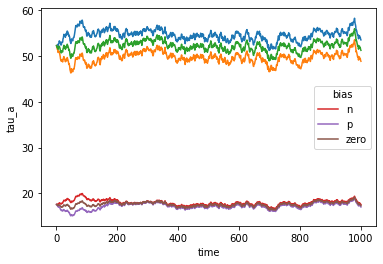

In [24]:
# define path and open datasets
dir_path = '/Users/oberrauch/work/master/data/tau/'
f_name = '{}_bias_{}.nc'
mb_model = 'random'
bias = ['n', 'p', 'zero']
ds = list()
for b in bias:
    f_path = os.path.join(dir_path, f_name.format(mb_model, b))
    ds.append(xr.open_dataset(f_path))
    
# concat datasets into one
ds = xr.concat(ds, dim=pd.Index(data=bias, name='bias'))
# remove entry at time = 0
ds = ds.drop_sel(time=0)

# plot time scales
ds.tau_l.plot.line(x='time')
ds.tau_a.plot.line(x='time')